In [22]:
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import datasets,decomposition,manifold
import sklearn.neighbors as nb
import struct
import mnist
import math
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline

In [88]:
def LE(data, d, k, t):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    print("data dimensional reducing")
    print("computing distance")
    data = np.matrix(data)
    
    N = data.shape[0]
    D = data.shape[1]
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance N*N
    data_tmp = np.sum(np.multiply(data, data), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data*data.T)
    sort_index = np.argsort(distance,axis=1)
    # k nearest neibors
    neibors = sort_index[:,1:k+1]
    print("computing weights")
    # step 2
    # weights
    W=np.zeros([N,N])
    D=np.zeros([N,N])
    for i in range(N):
        for j in neibors[i].A[0]:
            W[i, j] = math.exp(-distance[i, j]/t)
            D[i, i] +=W[i, j]  
    print("computing outputs")
    # Step 3
    # eigen 
    L=D-W
    X=np.dot(np.mat(D).I, L)  
    eigenValues, eigenVectors=np.linalg.eig(X)
    eigenValuesIndex = np.argsort(eigenValues)  
    output = np.mat(eigenVectors[:, eigenValuesIndex[1:d+1]])
    print("LE done")
    return output


training data loading
training data loaded
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
drawing


/Users/killandy/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


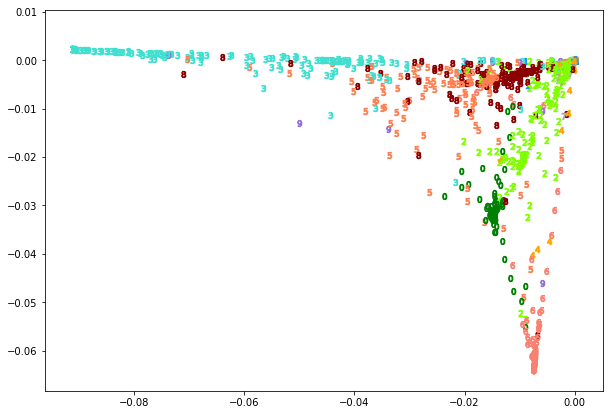

In [92]:
train_data, train_labels=mnist.load_mnist_training(2000)
# normalize
train_data = train_data/255
low_data = LE(train_data, 2, 5, 10)


# draw the scatters
print("drawing")
fig = plt.figure(figsize=(10,7))
plotwindow = fig.add_subplot(111)
a = np.array(low_data)
color = ['green','dodgerblue','chartreuse','turquoise','orange','coral','salmon','darkgray','darkred','mediumpurple']
marker = ["$0$","$1$","$2$","$3$","$4$","$5$","$6$","$7$","$8$","$9$"]
for j in range(len(low_data)):
    plt.scatter(a[j][0], a[j][1],s=40, c=color[train_labels[j]],marker=marker[train_labels[j]])
plt.show()

In [95]:
train_data, train_labels=mnist.load_mnist_training(1000)
# normalize
train_data = train_data/255
for i in range(2,20):
    low_data = LE(train_data, i, 10, 10)
    knn = nb.KNeighborsClassifier(n_neighbors = 1)  
    knn.fit(low_data[:500], train_labels[:500])
    s = knn.score(low_data[500:1000], train_labels[500:1000])
    print("d,k,t",i,10,10)
    print("KNN score",s)

training data loading
training data loaded
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 2 10 10
KNN score 0.678
data dimensional reducing
computing distance
computing weights
computing outputs


/Users/killandy/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


LE done
d,k,t 3 10 10
KNN score 0.718
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 4 10 10
KNN score 0.736
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 5 10 10
KNN score 0.766
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 6 10 10
KNN score 0.762
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 7 10 10
KNN score 0.782
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 8 10 10
KNN score 0.782
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 9 10 10
KNN score 0.8
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 10 10
KNN score 0.802
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 11 10 10
KNN score 0.8
data dimensi

In [98]:
train_data, train_labels=mnist.load_mnist_training(2000)
# normalize
train_data = train_data/255
for i in range(20,80,5):
    low_data = LE(train_data, 10, i, 10)
    knn = nb.KNeighborsClassifier(n_neighbors = 1)  
    knn.fit(low_data[:1000], train_labels[:1000])
    s = knn.score(low_data[1000:2000], train_labels[1000:2000])
    print("d,k,t",10,i,10)
    print("KNN score",s)

training data loading
training data loaded
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 20 10
KNN score 0.812
data dimensional reducing
computing distance


/Users/killandy/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


computing weights
computing outputs
LE done
d,k,t 10 25 10
KNN score 0.8
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 30 10
KNN score 0.795
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 35 10
KNN score 0.776
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 40 10
KNN score 0.788
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 45 10
KNN score 0.768
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 50 10
KNN score 0.784
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 55 10
KNN score 0.785
data dimensional reducing
computing distance
computing weights
computing outputs
LE done
d,k,t 10 60 10
KNN score 0.791
data dimensional reducing
computing distance
computing weights
computing outputs
LE don